****TITANIC SURVIVAL PREDICTION****

The Titanic was a British ferry operated by the White Star Line that sank in the North Atlantic Ocean on April 15, 1912, after hitting an iceberg during its maiden voyage from Southampton to New York City. Of the estimated 2,224 ferries and crew members, more than 15000 died, making the sinking at that time one of the deadliest from that time to the present. With much public attention in the aftermath, the disaster became the material of many works of art and became the basis of the film genre.

This dataset consists of 12 columns, namely:
1. PassengerId: the unique number of each passenger
2. Survive: ferry survives (1) or perishes (0)
3. Class P: ferry class
4. Name : ferry name
5. Gender: passenger gender
6. Age: passenger age
7. SibSp: number of siblings
8. Parch: number of parents/children
9. Ticket: ticket number
10. Fares: Amount of money used for tickets
11. Cabin: cabin category
12. Starting: The port where passengers depart (C = Cherbourg, Q = Queenstown, S = Southampton)

**1) Import Necessary Libraries**

In [1]:
#Data Analysis Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

**2) Read and Explore Dataset**

In [2]:
#Import train and test CSV file
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
#Look training dataset
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**3) Data Analysis**

In [4]:
#Look statistics describe training dataset
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
#To find out the data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the information above we know
*   Categorical Variables: Survived(integer), Sex(string), Pclass(integer), Embarked(string)
*   Numerical Variables: Age(float), Fare(float), Sibsp(integer), dan Parch(integer)
*   Unique Variables: PassengerId(string), Name(string), Ticket(string), Cabin(string)


In [6]:
#To know missing value train dataset
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Get a count of the number of numerical variables
def numbernumerical(variable):
   var = train_df[variable]
   varValue = var.value_counts()

   print('{} \n{} \n'.format(variable, varValue))

numerical = ['Age', 'Fare', 'SibSp', 'Parch']
for i in numerical:
  numbernumerical(i)

Age 
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64 

Fare 
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64 

SibSp 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

Parch 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 



In [8]:
#Sort the ages into logical categories
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)

print(train_df['AgeGroup'])

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888        Unknown
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']


In [9]:
#Get a count of the number of categorical variables
def numbercategorical(variable):
   var = train_df[variable]
   varValue = var.value_counts()

   print('{} \n{} \n'.format(variable, varValue))

category = ['Survived', 'AgeGroup', 'Sex', 'Pclass', 'Embarked']
for i in category:
  numbercategorical(i)

Survived 
0    549
1    342
Name: Survived, dtype: int64 

AgeGroup 
Young Adult    220
Adult          195
Unknown        177
Student        138
Teenager        70
Baby            44
Child           25
Senior          22
Name: AgeGroup, dtype: int64 

Sex 
male      577
female    314
Name: Sex, dtype: int64 

Pclass 
3    491
1    216
2    184
Name: Pclass, dtype: int64 

Embarked 
S    644
C    168
Q     77
Name: Embarked, dtype: int64 



In [10]:
#Get a count of the number of numerical variables
def numberalphanumeric(variable):
   var = train_df[variable]
   varValue = var.value_counts()

   print('{} \n{} \n'.format(variable, varValue))

alphanumeric = ['Ticket', 'Cabin']
for i in alphanumeric:
  numberalphanumeric(i)

Ticket 
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

Cabin 
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 



Some Observations:
- There were a total of 891 passengers in our training set and many who did not survive
- The Age variable lost about 19.8% of its value. I did age grouping so that sufficient missing values would be compared with the title names.
- The Cabin Variable lost about 77.1% of its value. Because so many variables are missing, it will be difficult to fill in the missing values. We will probably remove these values from our dataset.
- The Embarked Variable lost 0.22% of its value, which should be relatively harmless. Will be filled with the mode.
- The Variable Fare will be transformed by labeling the contents of the data

**4. Visualization**

<function print>

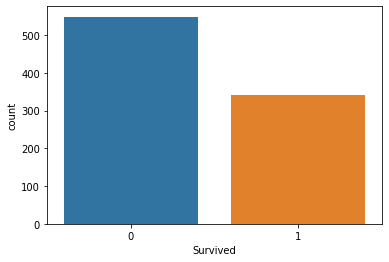

In [11]:
#Visualize the count of survivors
sns.countplot(train_df['Survived'])

print

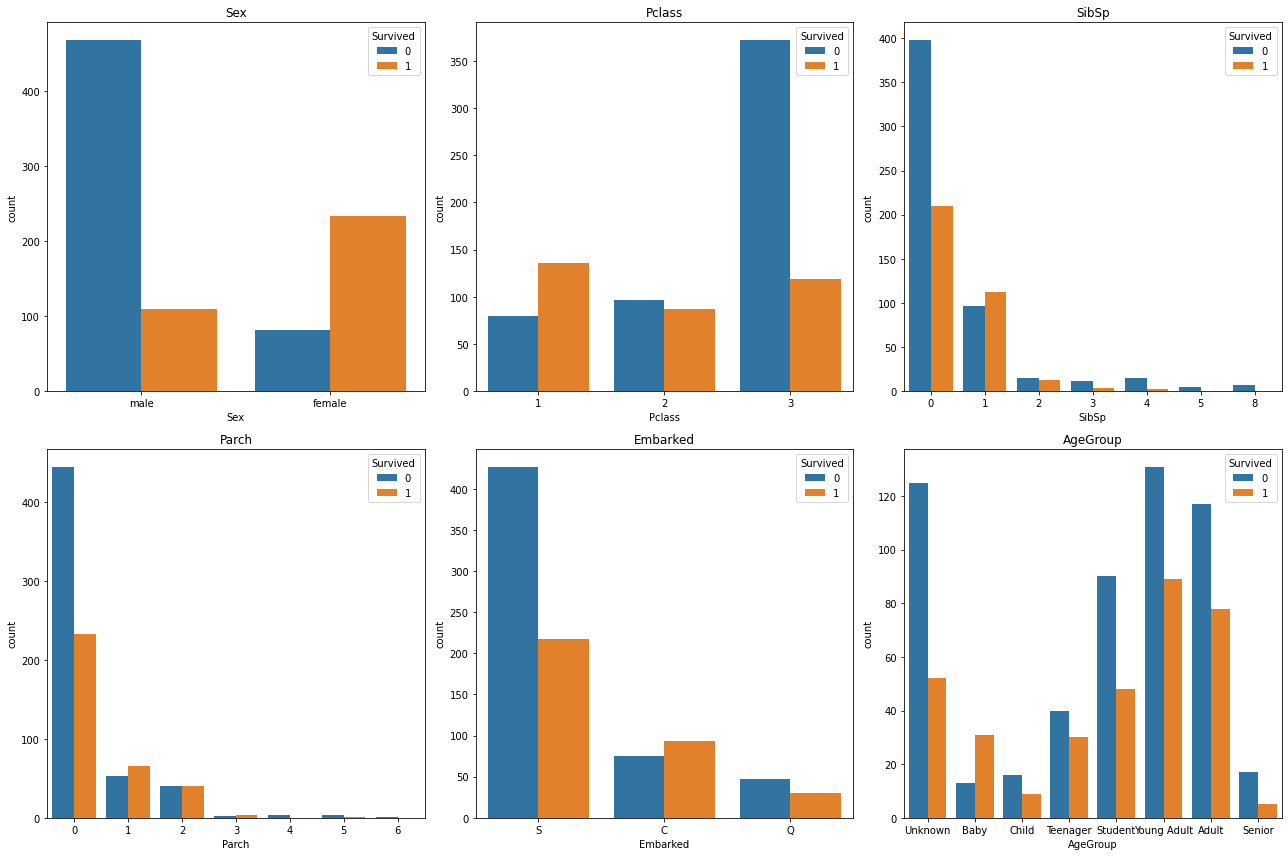

In [12]:
#Visualize the count of survivors for columns 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked'
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']

n_rows = 2
n_cols = 3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 6, n_rows * 6) )

for r in range(0, n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c #index to go through the number of columns
    ax = axs[r][c] #show where position each sub plot
    sns.countplot(train_df[cols[i]], hue= train_df['Survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title="Survived", loc = 'upper right')

plt.tight_layout()

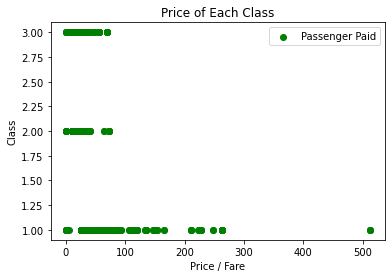

In [13]:
#Plot the prices paid of each class
plt.scatter(train_df["Fare"], train_df['Pclass'], color = 'green', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [14]:
#Print percentage of survival by column Sex, Pclass, SibSp, Parch, Embarked, AgeGroup
def mean(variable):
   var = train_df[[variable,'Survived']].groupby(variable, as_index = False)
   mean = var.mean().sort_values(by='Survived', ascending = False)

   print('Percentage of {} who survived \n {} \n'.format(variable, mean))

cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']
for i in cols:
  mean(i)

Percentage of Sex who survived 
       Sex  Survived
0  female  0.742038
1    male  0.188908 

Percentage of Pclass who survived 
    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 

Percentage of SibSp who survived 
    SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 

Percentage of Parch who survived 
    Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000 

Percentage of Embarked who survived 
   Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 

Percentage of AgeGroup who survived 
       AgeGroup  Survived
1         Baby  0.704545
3     Teenager  0.428571
5  Young Adult  0.404545
6        Adult  0.400000
2        Child  0.360000
4      Student  0.347826
0      Unknown  0.293785
7       Senior  0.227273 



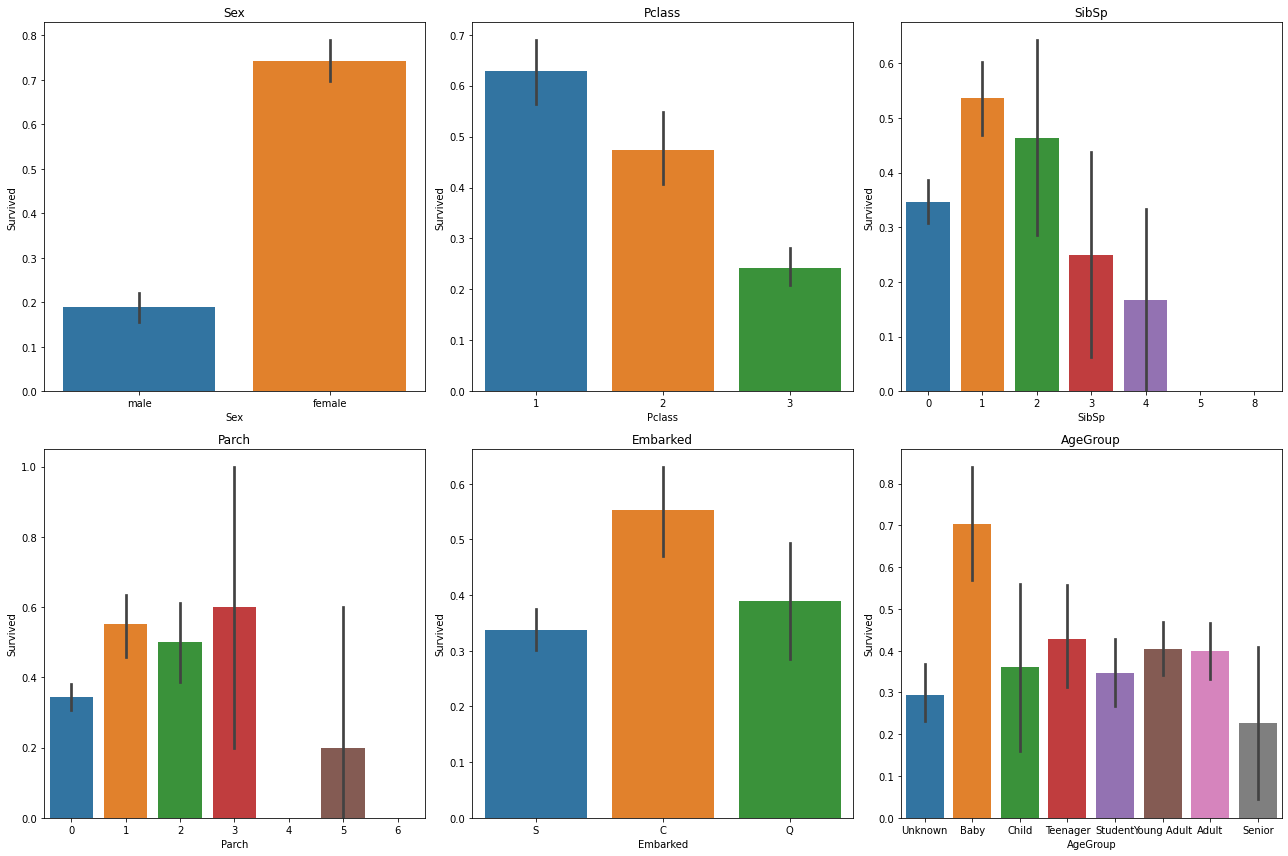

In [15]:
#Draw a bar plot of survival by column Sex, Pclass, SibSp, Parch, Embarked, AgeGroup
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'AgeGroup']

n_rows = 2
n_cols = 3

#The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 6, n_rows * 6) )

for r in range(0, n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c #index to go through the number of columns
    ax = axs[r][c] #show where position each sub plot
    sns.barplot(x=train_df[cols[i]], y=train_df["Survived"], data=train_df, ax=ax)
    ax.set_title(cols[i])
    
plt.tight_layout()

As prediction
- Female have a much higher chance of survival than men. The Sex feature is very important in our predictions.
- People with higher socioeconomic class have a higher survival rate
- In general, it is clear that people with more siblings or partners are less likely to survive. However, contrary to expectations, people without siblings or partners were less likely to survive than those with one or two people.
- People with less than four parents or children on board are more likely to survive than those with four or more parents. Again, people who travel alone are less likely to survive than those with 1-3 parents or children.
- Babies are more likely to survive than other age groups.

**6. Cleaning Data**

In [16]:
#Look testing dataset
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


In [17]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
dtype: int64

In [18]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64

In [19]:
#we'll start off by dropping the Cabin and Ticket feature since not a lot more useful information can be extracted from it.
train_df = train_df.drop(['Cabin', 'Ticket'], axis = 1)
test_df = test_df.drop(['Cabin', 'Ticket'], axis = 1)

In [20]:
#Missing value column Embarked
modus = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(modus)
train_df['Embarked'].isna().sum()

0

In [21]:
#create a combined group of both datasets
combine = [train_df, test_df]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [23]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


In [24]:
# fill missing age with mode age group for each title
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_df[train_df["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train_df["AgeGroup"])):
    if train_df["AgeGroup"][x] == "Unknown":
        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]]
        
for x in range(len(test_df["AgeGroup"])):
    if test_df["AgeGroup"][x] == "Unknown":
        test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]

In [25]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping)
test_df['AgeGroup'] = test_df['AgeGroup'].map(age_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,1


In [26]:
#drop the name feature since it contains no more useful information.
train_df = train_df.drop(['Name','Age'], axis = 1)
test_df = test_df.drop(['Name','Age'], axis = 1)

In [27]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4.0,1
1,2,1,1,1,1,0,71.2833,C,6.0,3
2,3,1,3,1,0,0,7.9250,S,5.0,2
3,4,1,1,1,1,0,53.1000,S,5.0,3
4,5,0,3,0,0,0,8.0500,S,5.0,1


In [28]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4.0,1
1,2,1,1,1,1,0,71.2833,2,6.0,3
2,3,1,3,1,0,0,7.9250,1,5.0,2
3,4,1,1,1,1,0,53.1000,1,5.0,3
4,5,0,3,0,0,0,8.0500,1,5.0,1


In [29]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test_df["Fare"])):
    if pd.isnull(test_df["Fare"][x]):
        pclass = test_df["Pclass"][x] #Pclass = 3
        test_df["Fare"][x] = round(train_df[train_df["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4, labels = [1, 2, 3, 4])
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4, labels = [1, 2, 3, 4])

In [30]:
#drop Fare values
train_df = train_df.drop(['Fare'], axis = 1)
test_df = test_df.drop(['Fare'], axis = 1)

In [31]:
#To know training dataset dtypes 
train_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int64
SibSp             int64
Parch             int64
Embarked          int64
AgeGroup        float64
Title             int64
FareBand       category
dtype: object

In [32]:
#To know training dataset dtypes 
test_df.dtypes

PassengerId       int64
Pclass            int64
Sex               int64
SibSp             int64
Parch             int64
Embarked          int64
AgeGroup        float64
Title             int64
FareBand       category
dtype: object

In [33]:
#Convert to numeric
train_df = train_df.apply(pd.to_numeric)

In [34]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Embarked         int64
AgeGroup       float64
Title            int64
FareBand         int64
dtype: object

In [35]:
test_df = test_df.apply(pd.to_numeric)

In [36]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
SibSp            int64
Parch            int64
Embarked         int64
AgeGroup       float64
Title            int64
FareBand         int64
dtype: object

**6. Choosing the Best Model**

In [37]:
#Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split

X = train_df.drop(['Survived', 'PassengerId'], axis = 1)
Y = train_df['Survived']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [38]:
#Build Machine Learning Models:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#2. Support Vector Machines
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)

#3. Support Vector Machines
svc_rbf = SVC(kernel = 'rbf', random_state = 0)

#4. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#5.  KNearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

#6. Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#7. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#8. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100 , random_state = 1 )

#9. AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

#10. Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=500, random_state=42, max_features=1., min_weight_fraction_leaf=0.5, criterion='gini')

#11. XGB Classifier
from xgboost import XGBClassifier
xgbc = XGBClassifier(objective="binary:logistic", random_state=42)

#List of all the models with their indices
modelNames = ["Logistic Regression", "SVC Linear", "SVCRBF", "Random Forest Classifier", "KNN Classifier", "Gaussian NaiveBayes", "Decision Tree",
              "Gradien Boosting Classifier", "AdaBoost Classifier", "Extra Trees Classifier", "XGG Classifier"]
models = [lr, svc_lin, svc_rbf, rf, knn, gnb, dt, gbc, abc, etc, xgbc]



In [39]:
#Create a function that returns train accuracy of different models.
def calculateTrainAccuracy(model):
    #Returns training accuracy of a model
    
    model.fit(X_train, Y_train)
    trainAccuracy = model.score(X_train, Y_train)
    trainAccuracy = round(trainAccuracy*100, 2)
    return trainAccuracy

# Calculate train accuracy of all the models and store them in a dataframe
modelScores = list(map(calculateTrainAccuracy, models))
trainAccuracy = pd.DataFrame(modelScores, columns = ["trainAccuracy"], index=modelNames)
trainAccuracySorted = trainAccuracy.sort_values(by="trainAccuracy", ascending=False)
print("Training Accuracy of the Classifiers:")
display(trainAccuracySorted)

[02:31:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy of the Classifiers:


,trainAccuracy
Decision Tree,89.89
Random Forest Classifier,89.19
XGG Classifier,89.19
KNN Classifier,85.25
Gradien Boosting Classifier,85.25
SVCRBF,83.71
Logistic Regression,82.58
SVC Linear,82.16
AdaBoost Classifier,82.02
Gaussian NaiveBayes,80.90


In [40]:
#Show the confusion matrix and accuracy for all of the models on the valuate data
from sklearn.metrics import confusion_matrix

for i in range(len(models)):
  cm = confusion_matrix(Y_val, models[i].predict(X_val))

  #Extract TN, FP, FN, TP
  TN, FP, FN, TP = confusion_matrix(Y_val, models[i].predict(X_val)).ravel()

  test_score = (TP + TN) / (TP + TN + FN +FP)

  print(cm)
  print('Model {} Validation Accuracy = "{}"'.format(modelNames[i], test_score))
  print()

[[89 21]
 [17 52]]
Model Logistic Regression Validation Accuracy = "0.7877094972067039"

[[87 23]
 [16 53]]
Model SVC Linear Validation Accuracy = "0.7821229050279329"

[[96 14]
 [17 52]]
Model SVCRBF Validation Accuracy = "0.8268156424581006"

[[94 16]
 [14 55]]
Model Random Forest Classifier Validation Accuracy = "0.8324022346368715"

[[96 14]
 [17 52]]
Model KNN Classifier Validation Accuracy = "0.8268156424581006"

[[86 24]
 [16 53]]
Model Gaussian NaiveBayes Validation Accuracy = "0.776536312849162"

[[98 12]
 [17 52]]
Model Decision Tree Validation Accuracy = "0.8379888268156425"

[[97 13]
 [19 50]]
Model Gradien Boosting Classifier Validation Accuracy = "0.8212290502793296"

[[95 15]
 [17 52]]
Model AdaBoost Classifier Validation Accuracy = "0.8212290502793296"

[[110   0]
 [ 69   0]]
Model Extra Trees Classifier Validation Accuracy = "0.6145251396648045"

[[99 11]
 [15 54]]
Model XGG Classifier Validation Accuracy = "0.8547486033519553"



I decided to use the Decision Tree Classifier model for the testing data

**7. Creating Submission File**

In [41]:
#set ids as PassengerId and predict survival 
ids = test_df['PassengerId']
predictions = dt.predict(test_df.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

Sources:
- https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner/notebook
- https://www.kaggle.com/eraaz1/a-comprehensive-guide-to-titanic-machine-learning
- https://www.youtube.com/watch?v=rODWw2_1mCI&t=5675s